# Input

In [46]:
# Enter desired resolution of mesh in metres.
# Room size is 4m x 3m. A mesh resolution of 0.1m is recommended.
dx = 0.1

# Save output grid data as csv? Output will be saved as output.csv in same folder.
savecsv = True

# Scroll down to view interpolated data and other output.

# Header Files

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Import CFD Data

In [48]:
table = pd.read_csv('export.csv', delimiter=',')
array = np.array(table)
count = 0
print('Array has the following variables.')
for name in table.columns:
    print(count, name)
    count+=1

Array has the following variables.
0 Node Number
1  Pressure [ Pa ]
2  Temperature [ K ]
3  Velocity [ m s^-1 ]
4  Velocity u [ m s^-1 ]
5  Velocity v [ m s^-1 ]
6  Velocity w [ m s^-1 ]
7  X [ m ]
8  Y [ m ]
9  Z [ m ]


Text(0.5, 1.0, 'Raw CFD data before interpolation')

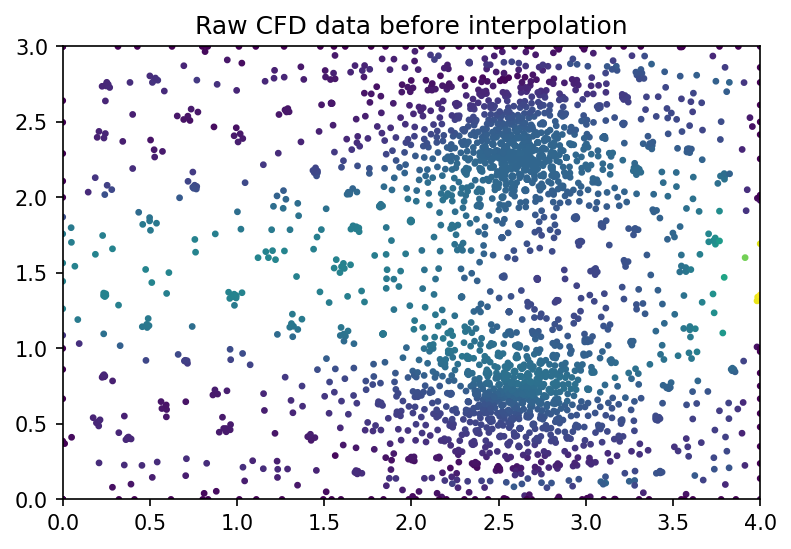

In [49]:
fig,ax = plt.subplots(1,1,num=1,figsize=(6,4),dpi=150)
ax.scatter(array[:,7],array[:,9],s=5,c=array[:,3],cmap='viridis')
ax.set_xlim([0,4])
ax.set_ylim([0,3])
ax.set_title('Raw CFD data before interpolation')

# Interpolation

<u><b>Cubic</b></u> interpolation scheme used for all variables.

In [50]:
m = 4.0 + 1e-10
n = 3.0 + 1e-10
x = array[:,7]
z = array[:,9]
velocity = array[:,3]
xvelocity = array[:,4]
yvelocity = array[:,5]
zvelocity = array[:,6]

grid_x, grid_z = np.mgrid[dx/2:m-dx/2:dx, dx/2:n-dx/2:dx]

grid_vel = griddata((x, z), velocity, (grid_x, grid_z), method='cubic')
grid_u = griddata((x, z), xvelocity, (grid_x, grid_z), method='cubic')
grid_v = griddata((x, z), yvelocity, (grid_x, grid_z), method='cubic')
grid_w = griddata((x, z), zvelocity, (grid_x, grid_z), method='cubic')

# Output plots

In [51]:
xcoord = grid_x.flatten()
ycoord = np.ones(xcoord.size)*1.5
zcoord = grid_z.flatten()
magvel = grid_vel.flatten()
x_vel = grid_u.flatten()
y_vel = grid_v.flatten()
z_vel = grid_w.flatten()

Text(0.5, 1.0, 'CFD data after interpolation')

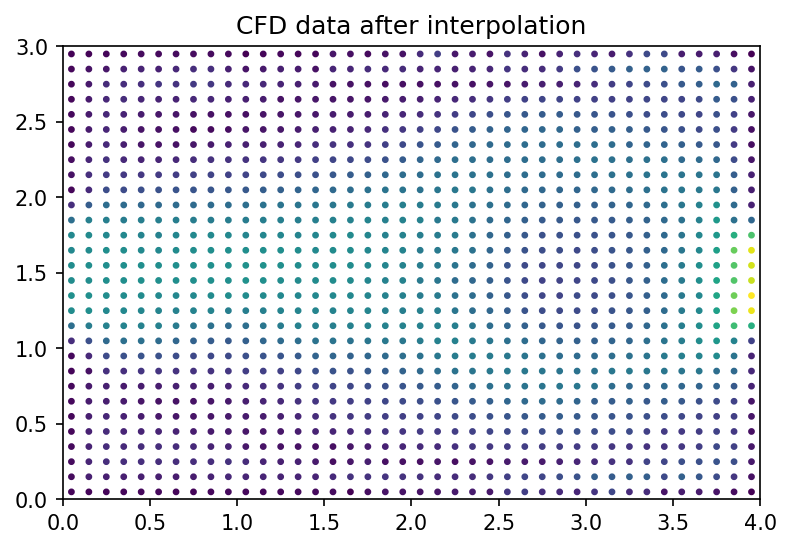

In [52]:
fig,ax = plt.subplots(1,1,num=1,figsize=(6,4),dpi=150)
ax.scatter(xcoord,zcoord,s=5,c=magvel,cmap='viridis')
ax.set_xlim([0,4])
ax.set_ylim([0,3])
ax.set_title('CFD data after interpolation')

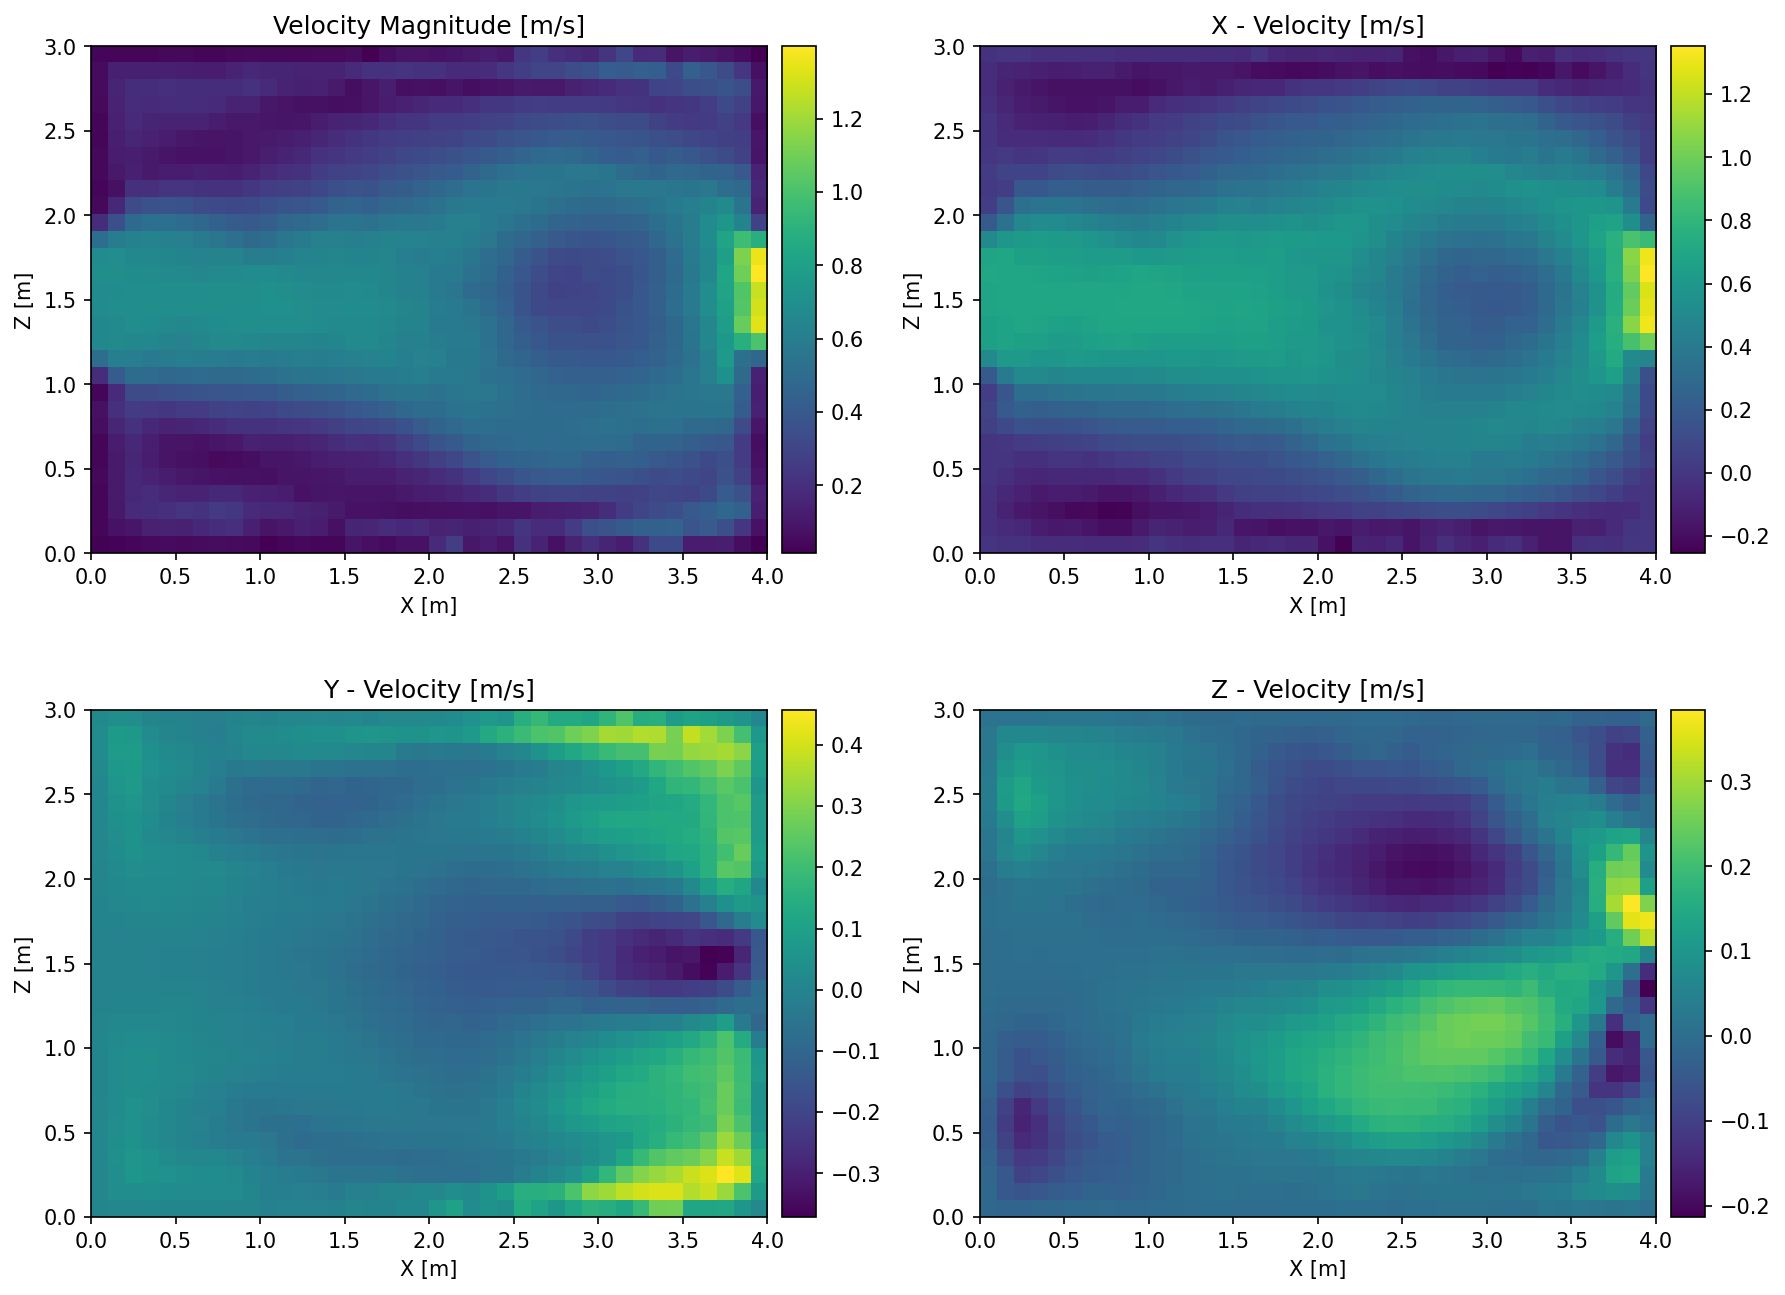

In [53]:
fig,axs = plt.subplots(2,2,figsize = (12,9), dpi=150)

axs = axs.flatten()

im1 = axs[0].imshow(grid_vel.T,extent=[0,m,0,n])
axs[0].set_xlabel('X [m]')
axs[0].set_ylabel('Z [m]')
axs[0].set_title('Velocity Magnitude [m/s]')
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im1, cax=cax)

im2 = axs[1].imshow(grid_u.T,extent=[0,m,0,n])
axs[1].set_xlabel('X [m]')
axs[1].set_ylabel('Z [m]')
axs[1].set_title('X - Velocity [m/s]')
divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im2, cax=cax)

im3 = axs[2].imshow(grid_v.T,extent=[0,m,0,n])
axs[2].set_xlabel('X [m]')
axs[2].set_ylabel('Z [m]')
axs[2].set_title('Y - Velocity [m/s]')
divider = make_axes_locatable(axs[2])
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im3, cax=cax)

im4 = axs[3].imshow(grid_w.T,extent=[0,m,0,n])
axs[3].set_xlabel('X [m]')
axs[3].set_ylabel('Z [m]')
axs[3].set_title('Z - Velocity [m/s]')
divider = make_axes_locatable(axs[3])
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im4, cax=cax)

plt.tight_layout()

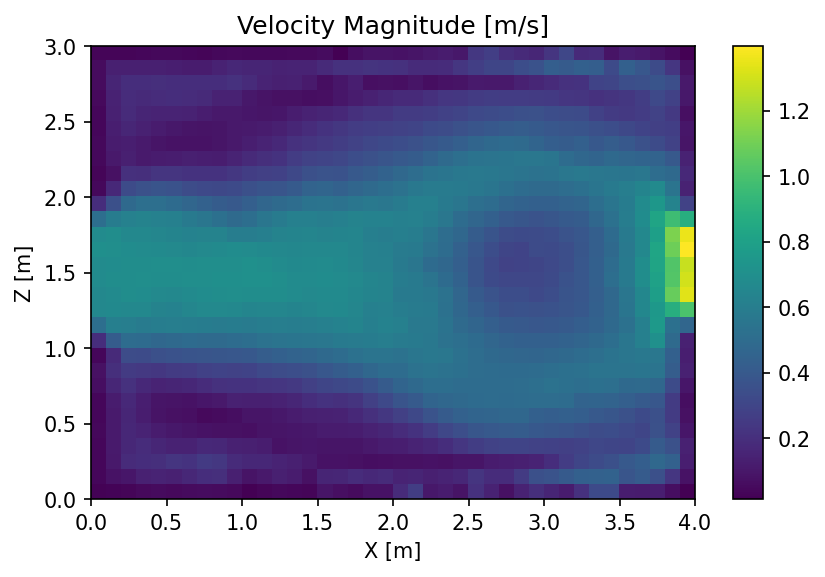

In [54]:
# Individual plots. 
# Change "grid_vel" to "grid_u", "grid_v", "grid_w" to visualize individually.

fig = plt.figure(figsize=(6,4),dpi=150)
ax = plt.gca()
im = plt.imshow(grid_vel.T,extent=[0,m,0,n])
plt.xlabel('X [m]')
plt.ylabel('Z [m]')
plt.title('Velocity Magnitude [m/s]')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.25)
plt.colorbar(im, cax=cax)
plt.show()

# Export interpolated data to CSV

In [55]:
if savecsv:
    header = 'X [m], Y [m], Z [m], Velocity [m/s], X-Velocity [m/s], Y-Velocity [m/s], Z-Velocity [m/s]'
    output = np.vstack((xcoord,ycoord,zcoord,magvel,x_vel,y_vel,z_vel)).T
    np.savetxt('output.csv',output,fmt='%.16e',delimiter=', ',newline='\n',header=header, comments='')